In [1]:
import os
import scipy
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# #omega_i = Omega_i h² 
z_pk        = 1.0         #evaluation redshift
h           = 0.6711       #h = H0/100
Mnu         = 0.0       #total mass of massive neutrino
omega_b     = 0.0220684     #baryons
omega_cdm   = 0.1209       #CDM
omega_ncdm  = Mnu/93.14            
logA        = 3.0631
n_s         = 0.9624

# #bias parameters
b1          = 2                
b2          = 1                 
bs2         = -4/7*(b1 - 1);        
b3nl        = 32/315*(b1 - 1);
# #EFT parameters
alpha0      = -48                 #units: [Mpc/h]^2
alpha2      = -20             #units: [Mpc/h]^2
alpha4      = 0.0               #units: [Mpc/h]^2
ctilde      = 1.4               #units: [Mpc/h]^4
# #Stochatics parameters
sn0         = 0.15          
sn2         = -8          #units: [Mpc/h]^2      
PshotP      = 1/0.0002118763;    #units: [Mpc/h]^3



In [3]:
import sys
sys.path.append('./FOLPS-nu/')
import FOLPSnu as FOLPS
kev = np.arange(0.01, 0.3, 0.005)
CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]
pklinear_fn = f'pkl_cb_z{z_pk}.dat'
inputpkT = np.loadtxt(pklinear_fn)
matrices = FOLPS.Matrices() # 10s
nonlinear = FOLPS.NonLinear(inputpkT, CosmoParams, EdSkernels = True)

N = 128 sampling points
M matrices have been computed


In [4]:
def KaiserLinear(mu, Table):
    f0 =FOLPS.f0
    (pkl, Fkoverf0, Ploop_dd, Ploop_dt, Ploop_tt, Pb1b2, Pb1bs2, Pb22, Pb2bs2, 
        Pb2s2, sigma23pkl, Pb2t, Pbs2t, I1udd_1, I2uud_1, I2uud_2, I3uuu_2, I3uuu_3, 
        I2uudd_1D, I2uudd_2D, I3uuud_2D, I3uuud_3D, I4uuuu_2D, I4uuuu_3D, I4uuuu_4D, sigma2w) = Table
    fk = Fkoverf0*f0
    #Linear Kaiser power spectrum
    return (1 + mu**2 * fk)**2 * pkl

def KaiserNonLinear(mu, Table):
    f0 =FOLPS.f0
    (pkl, Fkoverf0, Ploop_dd, Ploop_dt, Ploop_tt, Pb1b2, Pb1bs2, Pb22, Pb2bs2, 
        Pb2s2, sigma23pkl, Pb2t, Pbs2t, I1udd_1, I2uud_1, I2uud_2, I3uuu_2, I3uuu_3, 
        I2uudd_1D, I2uudd_2D, I3uuud_2D, I3uuud_3D, I4uuuu_2D, I4uuuu_3D, I4uuuu_4D, sigma2w) = Table
    fk = Fkoverf0*f0
    #linear power spectrum
    Pdt_L = pkl*Fkoverf0; Ptt_L = pkl*Fkoverf0**2;
    #Linear Kaiser power spectrum
    return (Ploop_dd + 2*f0*mu**2 * Ploop_dt+ mu**4 * f0**2 * Ploop_tt)

def TNSmodel(mu, Table):
    f0 =FOLPS.f0
    (pkl, Fkoverf0, Ploop_dd, Ploop_dt, Ploop_tt, Pb1b2, Pb1bs2, Pb22, Pb2bs2, 
        Pb2s2, sigma23pkl, Pb2t, Pbs2t, I1udd_1, I2uud_1, I2uud_2, I3uuu_2, I3uuu_3, 
        I2uudd_1D, I2uudd_2D, I3uuud_2D, I3uuud_3D, I4uuuu_2D, I4uuuu_3D, I4uuuu_4D, sigma2w) = Table
    fk = Fkoverf0*f0
    #linear power spectrum
    Pdt_L = pkl*Fkoverf0; Ptt_L = pkl*Fkoverf0**2;
    #Linear Kaiser power spectrum
    #RSD functions      
    def Af(mu, f0):
        return (f0*mu**2 * I1udd_1 + f0**2 * (mu**2 * I2uud_1 + mu**4 * I2uud_2)
                    + f0**3 * (mu**4 * I3uuu_2 +  mu**6 * I3uuu_3)) 
    def Df(mu, f0):
        return (f0**2 * (mu**2 * I2uudd_1D + mu**4 * I2uudd_2D) 
                    + f0**3 * (mu**4 * I3uuud_2D + mu**6 * I3uuud_3D)
                    + f0**4 * (mu**4 * I4uuuu_2D + mu**6 * I4uuuu_3D + mu**8 * I4uuuu_4D))
    #Introducing bias in RSD functions, eq.~ A.32 & A.33 at arXiv: 2208.02791
    return (Ploop_dd + 2*f0*mu**2 * Ploop_dt+ mu**4 * f0**2 * Ploop_tt + Af(mu, f0) + Df(mu, f0))

def FOLPSmodel(mu, Table):
    f0 =FOLPS.f0
    #Table
    (pkl, Fkoverf0, Ploop_dd, Ploop_dt, Ploop_tt, Pb1b2, Pb1bs2, Pb22, Pb2bs2, 
        Pb2s2, sigma23pkl, Pb2t, Pbs2t, I1udd_1, I2uud_1, I2uud_2, I3uuu_2, I3uuu_3, 
        I2uudd_1D, I2uudd_2D, I3uuud_2D, I3uuud_3D, I4uuuu_2D, I4uuuu_3D, I4uuuu_4D, sigma2w) = Table
    
    fk = Fkoverf0*f0
    #linear power spectrum
    Pdt_L = pkl*Fkoverf0; Ptt_L = pkl*Fkoverf0**2;   
    #one-loop power spectrum 
    Pdd = pkl + Ploop_dd; Pdt = Pdt_L + Ploop_dt; Ptt = Ptt_L + Ploop_tt;
    #biasing
    def PddXloop(b1, b2, bs2, b3nl):
        return (b1**2 * Ploop_dd + 2*b1*b2*Pb1b2 + 2*b1*bs2*Pb1bs2 + b2**2 * Pb22
                + 2*b2*bs2*Pb2bs2 + bs2**2 *Pb2s2 + 2*b1*b3nl*sigma23pkl)
        
    def PdtXloop(b1, b2, bs2, b3nl):
        return b1*Ploop_dt + b2*Pb2t + bs2*Pbs2t + b3nl*Fkoverf0*sigma23pkl
        
    def PttXloop(b1, b2, bs2, b3nl):
        return Ploop_tt
        
    #RSD functions       
    def Af(mu, f0):
        return (f0*mu**2 * I1udd_1 + f0**2 * (mu**2 * I2uud_1 + mu**4 * I2uud_2)
                    + f0**3 * (mu**4 * I3uuu_2 +  mu**6 * I3uuu_3)) 
        
    def Df(mu, f0):
        return (f0**2 * (mu**2 * I2uudd_1D + mu**4 * I2uudd_2D) 
                    + f0**3 * (mu**4 * I3uuud_2D + mu**6 * I3uuud_3D)
                    + f0**4 * (mu**4 * I4uuuu_2D + mu**6 * I4uuuu_3D + mu**8 * I4uuuu_4D))
        
    #Introducing bias in RSD functions, eq.~ A.32 & A.33 at arXiv: 2208.02791
    def ATNS(mu, b1):
        return b1**3 * Af(mu, f0/b1)
        
    def DRSD(mu, b1):
        return b1**4 * Df(mu, f0/b1)
            
    def GTNS(mu, b1):
        return -((kev*mu*f0)**2 *sigma2w*(b1**2 * pkl + 2*b1*f0*mu**2 * Pdt_L 
                                + f0**2 * mu**4 * Ptt_L))
        
        
    #One-loop SPT power spectrum in redshift space
    def PloopSPTs(mu, b1, b2, bs2, b3nl):
        return (PddXloop(b1, b2, bs2, b3nl) + 2*f0*mu**2 * PdtXloop(b1, b2, bs2, b3nl)
                    + mu**4 * f0**2 * PttXloop(b1, b2, bs2, b3nl) + ATNS(mu, b1) + DRSD(mu, b1)
                    + GTNS(mu, b1))
        
        
    #Linear Kaiser power spectrum
    def PKaiserLs(mu, b1):
        return (b1 + mu**2 * fk)**2 * pkl
        
    def PctNLOs(mu, b1, ctilde):
        return ctilde*(mu*kev*f0)**4 * sigma2w**2 * PKaiserLs(mu, b1)
    
    # EFT counterterms
    def Pcts(mu, alpha0, alpha2, alpha4):
        return (alpha0 + alpha2 * mu**2 + alpha4 * mu**4)*kev**2 * pkl
    
    #Stochastics noise
    def Pshot(mu, alphashot0, alphashot2, PshotP):
        return PshotP*(alphashot0 + alphashot2 * (kev*mu)**2)

    return (PloopSPTs(mu, b1, b2, bs2, b3nl) + Pcts(mu, alpha0, alpha2, alpha4)
                + PctNLOs(mu, b1, ctilde) + Pshot(mu, sn0, sn2, PshotP))



In [5]:
# mu = -1
f0 =FOLPS.f0
print(f0)
# Table = FOLPS.TableOut_interp(kev)
# Table_NW = FOLPS.TableOut_NW_interp(kev)
# Fkoverf0 = Table[1]; fk = Fkoverf0*f0
# pkl = Table[0]; pkl_NW = Table_NW[0];
# Sigma2T = FOLPS.Sigma2Total(kev, mu, Table_NW)

# def PIRs(mu, pknl, pknl_NW):
#     f0 =FOLPS.f0
#     return ((b1 + fk * mu**2)**2 * (pkl_NW + np.exp(-kev**2 * Sigma2T)*(pkl-pkl_NW)*(1 + kev**2 * Sigma2T) )
#         + np.exp(-kev**2 * Sigma2T)*pknl
#         + (1 - np.exp(-kev**2 * Sigma2T))*pknl_NW) 

# pkl_nw = Table_NW[0]
# pkl_kaiser  = PIRs(mu, KaiserLinear(mu, Table), KaiserLinear(mu, Table_NW))
# pkl_kaiser_nl  = PIRs(mu, KaiserNonLinear(mu, Table), KaiserNonLinear(mu, Table_NW))
# pkl_TNS     = PIRs(mu, TNSmodel(mu, Table), TNSmodel(mu, Table_NW))
# pkl_FOLPS   = PIRs(mu, FOLPSmodel(mu, Table), FOLPSmodel(mu, Table_NW))

# # plt.plot(kev, kev*pkl_NW)
# # plt.plot(kev, kev*pkl_kaiser)
# plt.plot(kev, kev*pkl_kaiser_nl)
# plt.plot(kev, kev*pkl_TNS)
# plt.plot(kev, kev*pkl_FOLPS)

0.8778642281889943


In [12]:
import RSDmodel as RSD
kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

# Pz1 = [0.675, 0.119, 0.0223694, 3.27, 1.97, 0.6, -20, -23, 0.03, -3.6]
# Pz1 = [0.675, 0.119, 0.0223694, 3.27, 1.0, 0, -20, -23, 0, 0]

Pz1 = [0.675, 0.119, 0.0223694, 3.27, 1.97, 0.6, -20, -23, 0, 0]

# Pz1_smear = [0.6777, 0.1274, 0.02226, 3.042, 1.762, 0.21, 21, -22.2, -0.19, -4.93, 0.8314707197]
# Pz2 = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.18, -3.35]
# Pz2_smear = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.18, -3.35, 2.554015795]
# Pz3_smear = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.test18, -3.35, 5.960363582]

Pk_folps1 = RSD.FOLPSmultiples(Pz1, k_ev, 0.5)
# Pk_folps2 = RSD.FOLPSmultiples(Pz2, k_ev, 1.0)
print(Pk_folps1)
(k_f, pk0_f, pk2_f) = Pk_folps1
# plt.plot(Pk_folps0[0], Pk_folps0[0]*Pk_folps0[1])


(array([0.008, 0.014, 0.02 , 0.026, 0.032, 0.038, 0.044, 0.05 , 0.056,
       0.062, 0.068, 0.074, 0.08 , 0.086, 0.092, 0.098, 0.104, 0.11 ,
       0.116, 0.122, 0.128, 0.134, 0.14 , 0.146, 0.152, 0.158, 0.164,
       0.17 , 0.176, 0.182, 0.188, 0.194, 0.2  ]), array([23206.53181906, 27438.07787473, 26582.00875243, 23435.97207903,
       19733.83453363, 16422.50264609, 13890.26537794, 12084.84013078,
       10844.21642464,  9901.23828851,  9061.9798767 ,  8205.36659115,
        7310.18843381,  6419.03954442,  5598.24306898,  4905.67772816,
        4355.8858175 ,  3933.18319986,  3605.78359328,  3337.79344642,
        3096.47297986,  2860.70391789,  2625.42904298,  2395.13151443,
        2177.87317356,  1980.83984518,  1807.23909499,  1655.26892205,
        1521.00099004,  1400.6404041 ,  1291.2621805 ,  1190.85093168,
        1098.1808467 ]), array([19148.10744441, 22555.30705382, 21743.43708336, 19064.98694058,
       15968.95578329, 13230.58883112, 11150.88042042,  9671.54245994,
   

/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z0.5/pk/fiducial_199_z0.5.pk


(0.0, 0.3)

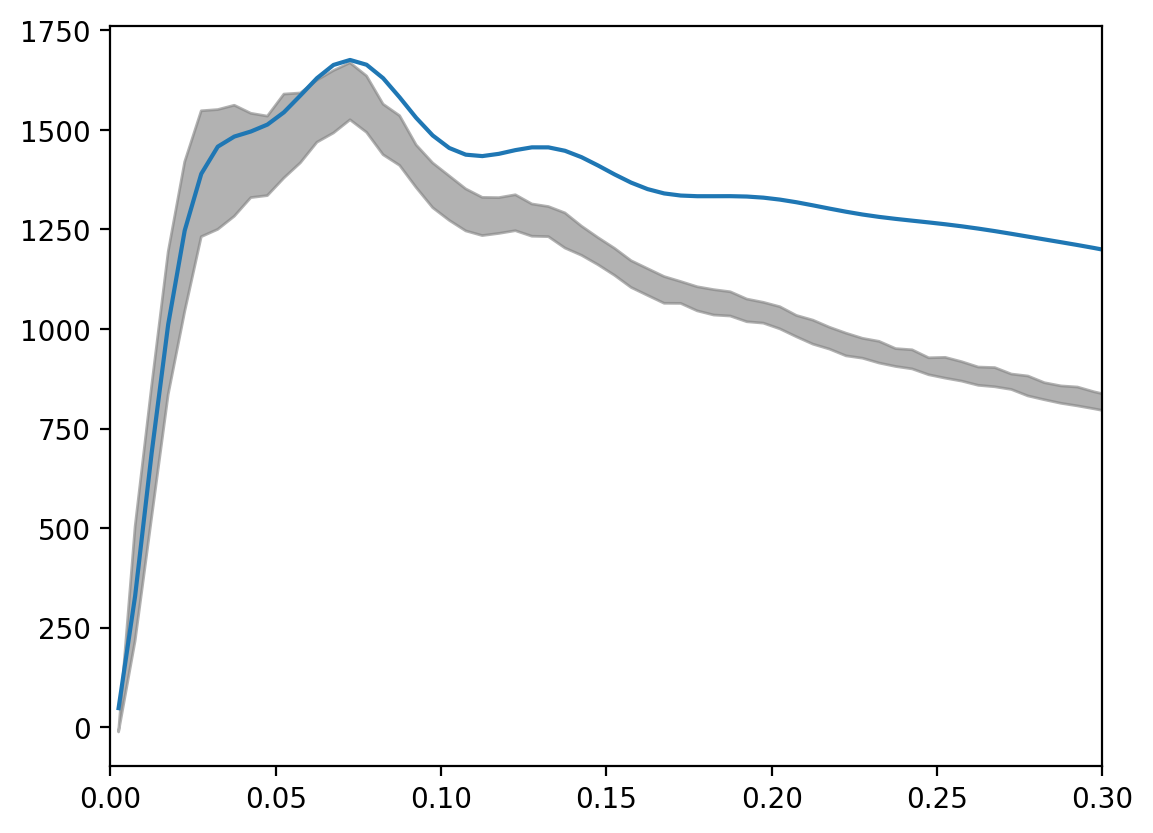

In [ ]:
def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/fiducial/{r_pk}_z{redshift}/pk'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

[k_ev, pk0, pk2, cov] = Pkload('fiducial', 'RSD', 0.5)

plt.fill_between(k_ev,  k_ev*(pk0[0]-pk0[1]),
                    k_ev*(pk0[0]+pk0[1]), alpha=0.6, color='grey') 
plt.plot(Pk_folps1[0], Pk_folps2[0]*Pk_folps1[1])
plt.xlim([0,0.3])

/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z0.5/pk/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z1.0/pk/fiducial_199_z1.0.pk


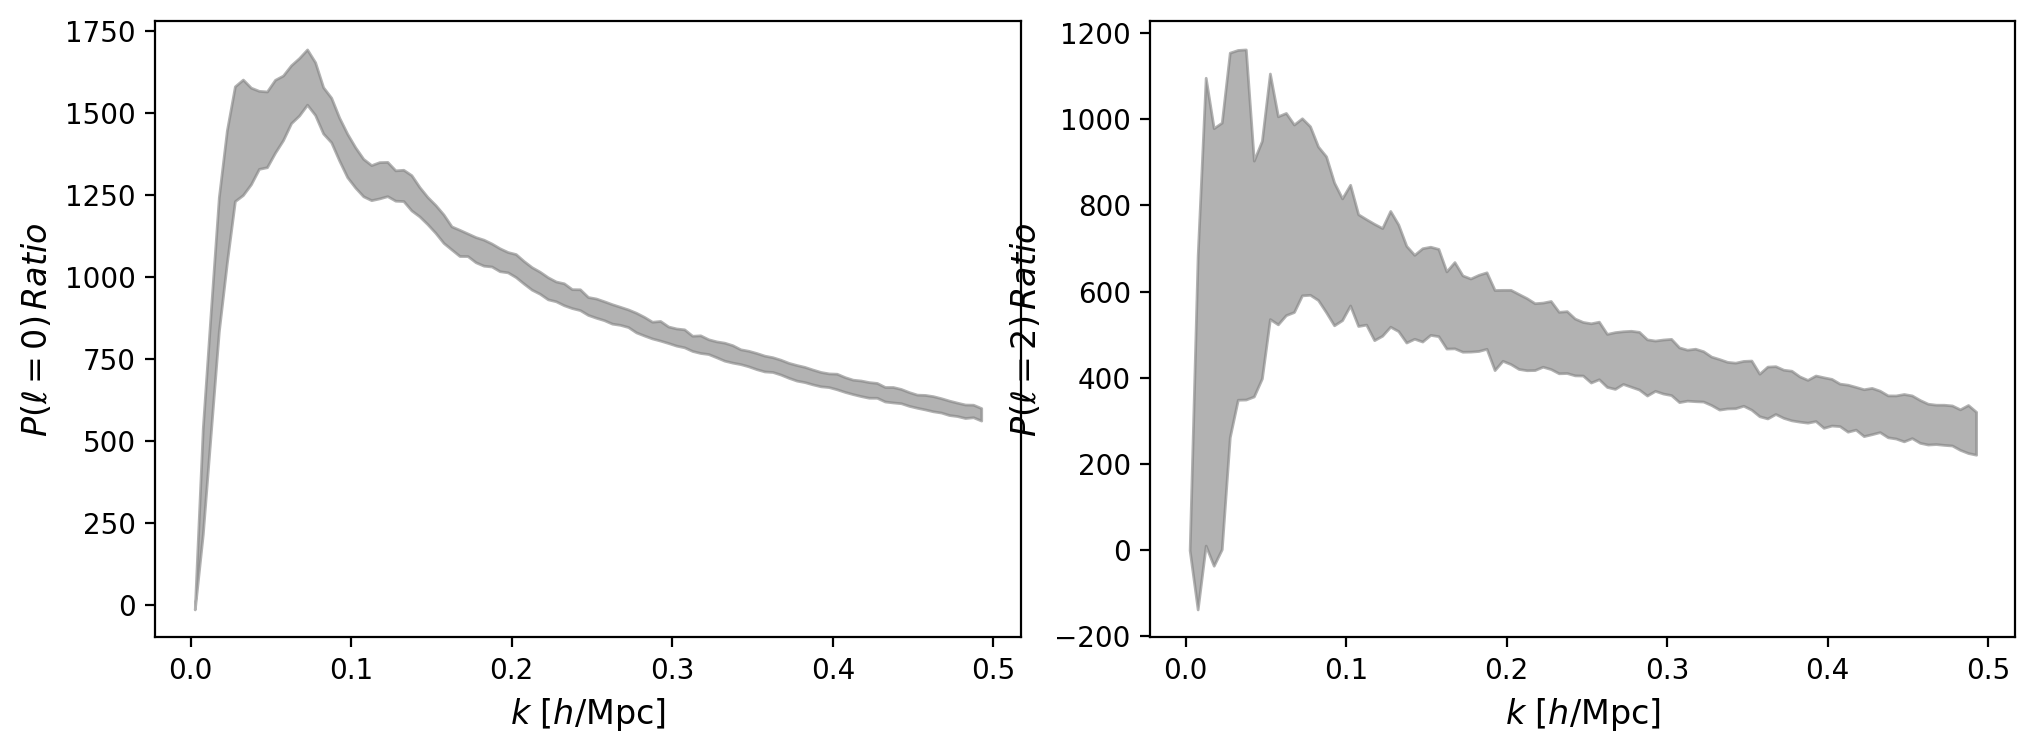

In [ ]:

def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/fiducial/{r_pk}_z{redshift}/pk'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

label_fontsize = 12
legend_fontsize = 12.5
systematic_map  = {
    'RSD': 'fiducial',
    'LRG': '+LRG vsmear',
    'QSO': '+QSO vsmear',
    '1%CATAS': '+1%vcatas',
    '5%CATAS': '+5%vcatas'
    }

fig, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize = (12, 4))
fig.subplots_adjust(wspace=0.15)
fig.subplots_adjust(hspace=0.1)

colors = ['darkblue', 'maroon']
lss = ['-', '--']
Pkobs = []
for d in range(2):
    if d == 0:
        z_pk = 0.5
        r_pks = ['RSD']
    elif d == 1:
        z_pk = 1.0
        r_pks = ['RSD']   
    labels = []
    for t,r_pk in enumerate(r_pks):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload('fiducial', r_pk, z_pk)
        Pkobs.append([pk0, pk2])
        labels.append(f'obs {systematic}')
        if t == 0:
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]

for ell, i in zip(['monopole','quadrupole'],range(2)):
    # axs[i][d].plot(k_ev, (Pkobs[1][i][0]/Pkobs[0][i][0]), color = colors[i], linestyle=lss[t-1])
    # axs[i][d].fill_between(k_ev,  (Pkobs[t][i][0]-Pkobs[t][i][1])/Pkobs[0][i][0],
    #                     (Pkobs[1][i][0]+Pkobs[1][i][1])/Pkobs[0][i][0],alpha=0.6, color='grey') 
    # axs[i].plot(k_ev, k_ev*(Pkobs[0][i][0]), color = colors[i], linestyle=lss[t-1])
    axs[i].fill_between(k_ev,  k_ev*(Pkobs[t][i][0]-Pkobs[t][i][1]),
                        k_ev*(Pkobs[0][i][0]+Pkobs[1][i][1]), alpha=0.6, color='grey') 
    axs[i].plot(k_ev, k_ev*(Pkobs[0][i][0]), color = colors[i], linestyle=lss[t-1])

    # axs[i][d].plot(k_ev, ratio_smear[d][i], color = 'black') 
    axs[i].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
    axs[i].set_ylabel(r'$P(\ell = {}) \, Ratio$'.format(i*2), fontsize = label_fontsize)


plt.show()